In [29]:
import pandas as pd

# Load the dataset
file_path = 'Dataset.csv'
dataset = pd.read_csv(file_path)
dataset.head()

,Location,temperature,humidity,ph,rainfall,N,P,K,label,price,Price_Date
0,Yercaud,20.879744,82.002744,6.502985,202.935536,104,23,106,rice,210,30-Apr-11
1,Vriddhachalam,21.770462,80.319644,7.038096,226.655537,125,28,?,rice,45,1-May-11
2,Virugambakkam,23.004459,82.320763,7.840207,263.964248,103,13,159,rice,70,2-May-11
3,Virudhunagar,26.491096,80.158363,6.980401,242.864034,63,9,159,rice,18,3-May-11
4,Viralimalai,20.130175,81.604873,7.628473,262.717340,54,10,159,rice,37,4-May-11


In [30]:
# Initial Analysis
# Checking for missing and inconsistent data
missing_values = dataset.isnull().sum()
inconsistent_data = dataset.map(lambda x: x == '?').sum()

In [31]:
# Data Type Analysis
data_types

Location        object
temperature    float64
humidity       float64
ph             float64
rainfall       float64
N               object
P               object
K               object
label           object
price            int64
Price_Date      object
dtype: object

In [32]:
# Statistical Summary
statistical_summary = dataset.describe()
statistical_summary

,temperature,humidity,ph,rainfall,price
count,3052.000000,3078.000000,3075.000000,3065.000000,3100.000000
mean,27.099525,65.947509,6.368724,110.146662,645.275161
std,7.580405,24.027983,0.811364,64.029390,478.680867
min,8.825675,10.034048,3.504752,20.211267,1.000000
25%,22.789600,55.198473,5.893844,65.069625,111.000000
50%,26.107057,68.931169,6.341249,96.747070,679.000000
75%,29.365644,84.424540,6.841992,140.937041,1036.250000
max,54.986760,99.981876,9.935091,397.315380,1921.000000


In [33]:
# Data Cleaning
# Step 1: Handle Missing Values - Impute with median
for column in ['temperature', 'humidity', 'ph', 'rainfall']:
    median_value = dataset[column].median()
    dataset[column].fillna(median_value, inplace=True)

In [34]:
# Step 2: Correct Inconsistent Data
# Convert 'N', 'P', 'K' to numeric, replacing '?' with NaN
for nutrient in ['N', 'P', 'K']:
    dataset[nutrient] = pd.to_numeric(dataset[nutrient], errors='coerce')


In [35]:
# Impute missing values in 'N', 'P', 'K' with median
for nutrient in ['N', 'P', 'K']:
    median_value = dataset[nutrient].median()
    dataset[nutrient].fillna(median_value, inplace=True)

In [36]:
# Outlier Check
outlier_check = dataset[['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K']].describe()
outlier_check

,temperature,humidity,ph,rainfall,N,P,K
count,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.084158,65.968683,6.368502,109.995376,88.693548,15.339677,162.274194
std,7.522469,23.943853,0.808088,63.682534,20.639211,9.934171,32.378145
min,8.825675,10.034048,3.504752,20.211267,50.000000,6.000000,39.000000
25%,22.905954,55.277082,5.898330,65.362857,69.000000,10.000000,149.000000
50%,26.107057,68.931169,6.341249,96.747070,94.000000,13.000000,169.000000
75%,29.317880,84.287741,6.834163,140.379169,103.000000,18.000000,185.500000
max,54.986760,99.981876,9.935091,397.315380,129.000000,79.000000,295.000000


In [37]:
dataset.dtypes

Location        object
temperature    float64
humidity       float64
ph             float64
rainfall       float64
N              float64
P              float64
K              float64
label           object
price            int64
Price_Date      object
dtype: object

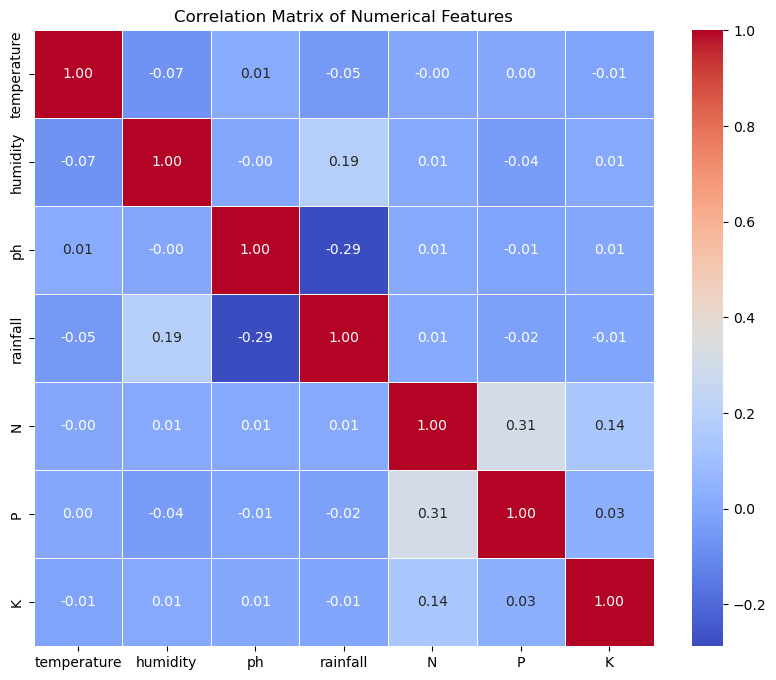

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Analysis
numerical_features = dataset[['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K']]
correlation_matrix = numerical_features.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


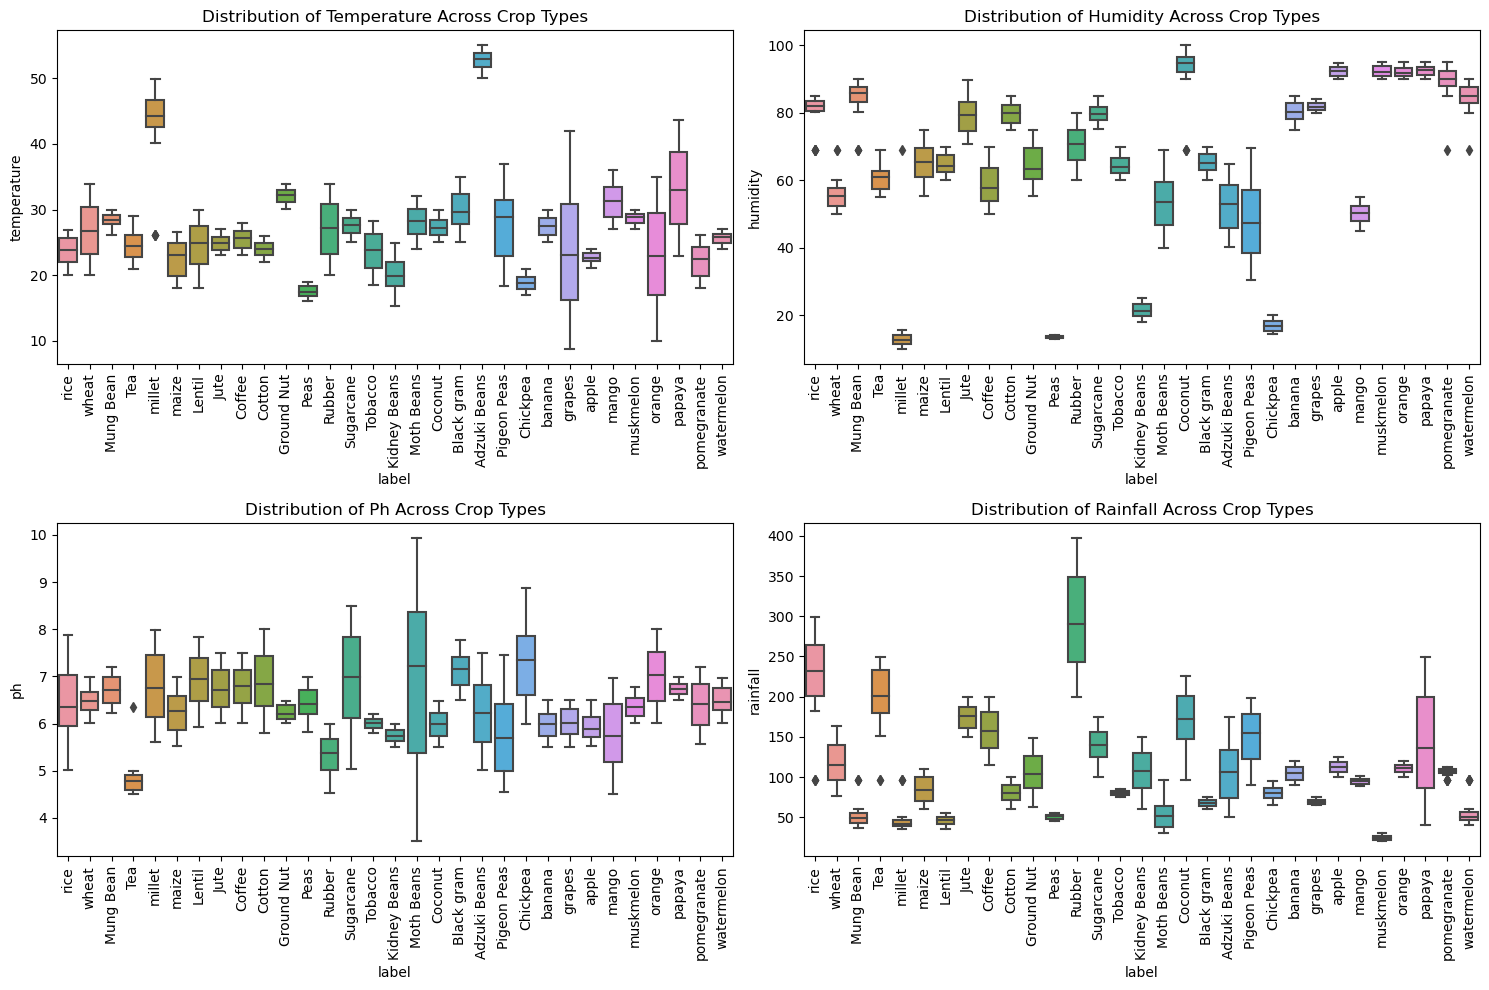

In [39]:
# Analyzing the distribution of features across different crop types
# Selecting a subset of features for visualization
selected_features = ['temperature', 'humidity', 'ph', 'rainfall']
crop_type = dataset['label']

# Creating box plots for each feature against the crop type
plt.figure(figsize=(15, 10))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=crop_type, y=dataset[feature])
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature.capitalize()} Across Crop Types')

plt.tight_layout()
plt.show()


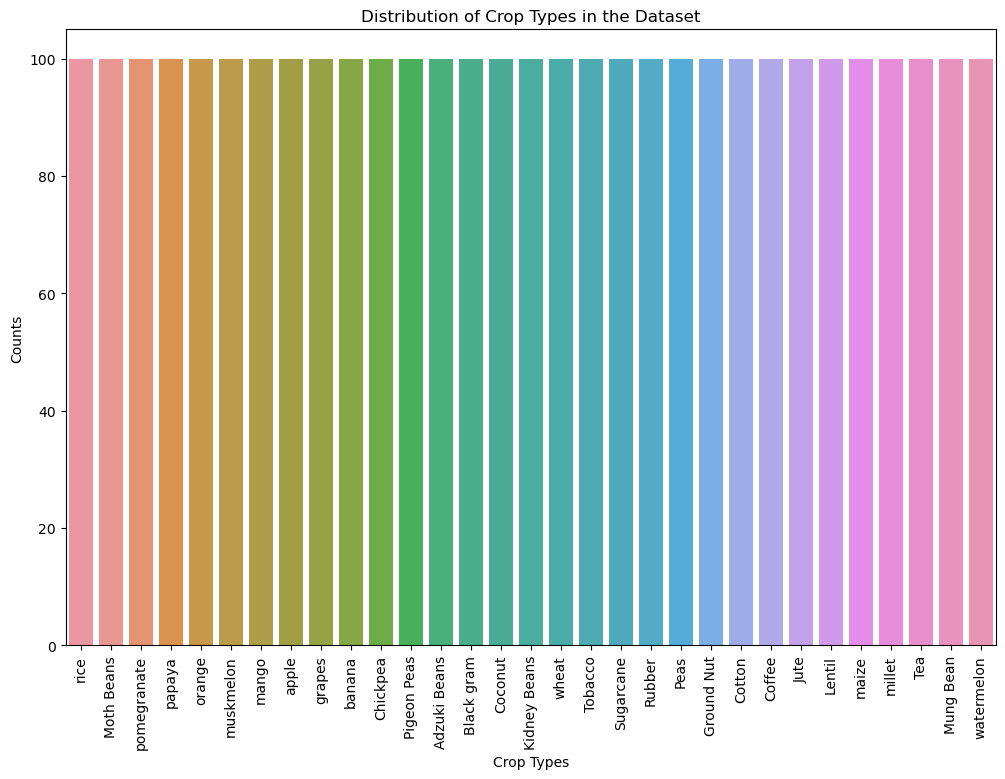

label
rice            100
Moth Beans      100
pomegranate     100
papaya          100
orange          100
muskmelon       100
mango           100
apple           100
grapes          100
banana          100
Chickpea        100
Pigeon Peas     100
Adzuki Beans    100
Black gram      100
Coconut         100
Kidney Beans    100
wheat           100
Tobacco         100
Sugarcane       100
Rubber          100
Peas            100
Ground Nut      100
Cotton          100
Coffee          100
Jute            100
Lentil          100
maize           100
millet          100
Tea             100
Mung Bean       100
watermelon      100
Name: count, dtype: int64

In [40]:
# Balance of Crop Types
crop_type_counts = dataset['label'].value_counts()

# Plotting the distribution of crop types
plt.figure(figsize=(12, 8))
sns.barplot(x=crop_type_counts.index, y=crop_type_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Crop Types')
plt.ylabel('Counts')
plt.title('Distribution of Crop Types in the Dataset')
plt.show()

# Displaying the counts for reference
crop_type_counts


c:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

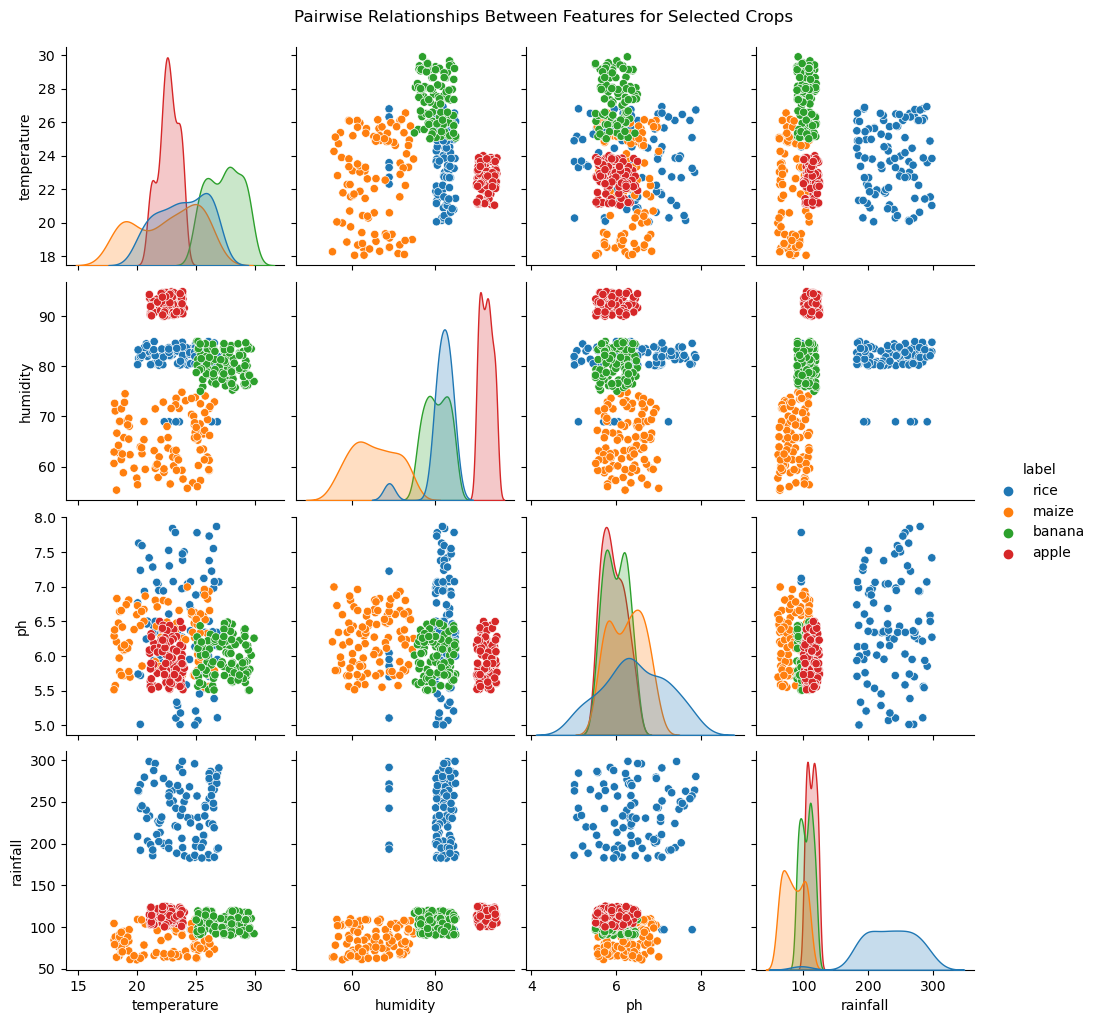

In [41]:
# Selecting a subset of crops for clearer visualization
selected_crops = ['rice', 'maize', 'apple', 'banana', 'coffee']

# Filtering the dataset for the selected crops
subset_dataset = dataset[dataset['label'].isin(selected_crops)]

# Creating pair plots for the selected subset
sns.pairplot(subset_dataset, hue='label', vars=selected_features)
plt.suptitle('Pairwise Relationships Between Features for Selected Crops', y=1.02)
plt.show()


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Data Preparation
# Features and Target Variable
X = dataset[['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K']]
y = dataset['label']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection: Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Training the Model
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep



(0.9290322580645162,
 '              precision    recall  f1-score   support\n\nAdzuki Beans       1.00      1.00      1.00        18\n  Black gram       1.00      1.00      1.00        20\n    Chickpea       1.00      1.00      1.00        19\n     Coconut       0.94      0.89      0.92        19\n      Coffee       0.75      0.95      0.84        22\n      Cotton       0.86      0.92      0.89        13\n  Ground Nut       0.86      1.00      0.93        19\n        Jute       0.89      0.89      0.89        18\nKidney Beans       1.00      1.00      1.00        15\n      Lentil       0.95      1.00      0.97        18\n  Moth Beans       1.00      0.93      0.97        15\n   Mung Bean       1.00      0.95      0.98        22\n        Peas       1.00      1.00      1.00        20\n Pigeon Peas       0.93      0.78      0.85        18\n      Rubber       0.92      0.96      0.94        25\n   Sugarcane       1.00      0.83      0.91        18\n         Tea       0.95      1.00      0

In [44]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Displaying the classification report in a DataFrame for better readability
class_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

class_report_df.round(2)


,precision,recall,f1-score,support
Adzuki Beans,1.00,1.00,1.00,18.00
Black gram,1.00,1.00,1.00,20.00
Chickpea,1.00,1.00,1.00,19.00
Coconut,0.94,0.89,0.92,19.00
Coffee,0.75,0.95,0.84,22.00
Cotton,0.86,0.92,0.89,13.00
Ground Nut,0.86,1.00,0.93,19.00
Jute,0.89,0.89,0.89,18.00
Kidney Beans,1.00,1.00,1.00,15.00
Lentil,0.95,1.00,0.97,18.00


In [46]:
# Re-running the Grid Search to find the best parameters
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3,  # Using 3-fold cross-validation
                           n_jobs=-1,  # Using all available cores
                           verbose=2)

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Retrieving the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Retraining the model with the best parameters
optimal_model = RandomForestClassifier(**best_params, random_state=42)
optimal_model.fit(X_train, y_train)

# Evaluating the optimal model
optimal_y_pred = optimal_model.predict(X_test)
optimal_accuracy = accuracy_score(y_test, optimal_y_pred)
optimal_classification_rep = classification_report(y_test, optimal_y_pred)

best_params, best_score, optimal_accuracy, optimal_classification_rep



Fitting 3 folds for each of 24 candidates, totalling 72 fits


({'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 200},
 0.9092692843333304,
 0.9290322580645162,
 '              precision    recall  f1-score   support\n\nAdzuki Beans       1.00      1.00      1.00        18\n  Black gram       1.00      0.95      0.97        20\n    Chickpea       1.00      1.00      1.00        19\n     Coconut       0.94      0.89      0.92        19\n      Coffee       0.72      0.95      0.82        22\n      Cotton       0.86      0.92      0.89        13\n  Ground Nut       0.86      1.00      0.93        19\n        Jute       0.85      0.94      0.89        18\nKidney Beans       1.00      1.00      1.00        15\n      Lentil       0.95      1.00      0.97        18\n  Moth Beans       1.00      0.93      0.97        15\n   Mung Bean       1.00      0.95      0.98        22\n        Peas       1.00      1.00      1.00        20\n Pigeon Peas       1.00      0.78      0.88        18\n      Rubber       0.96      0.92  

In [47]:
feature_importances = optimal_model.feature_importances_

# Creating a DataFrame for better visualization
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

feature_importances_df

,Feature,Importance
1,humidity,0.279853
3,rainfall,0.269311
0,temperature,0.214574
2,ph,0.161720
6,K,0.027982
4,N,0.026239
5,P,0.020321


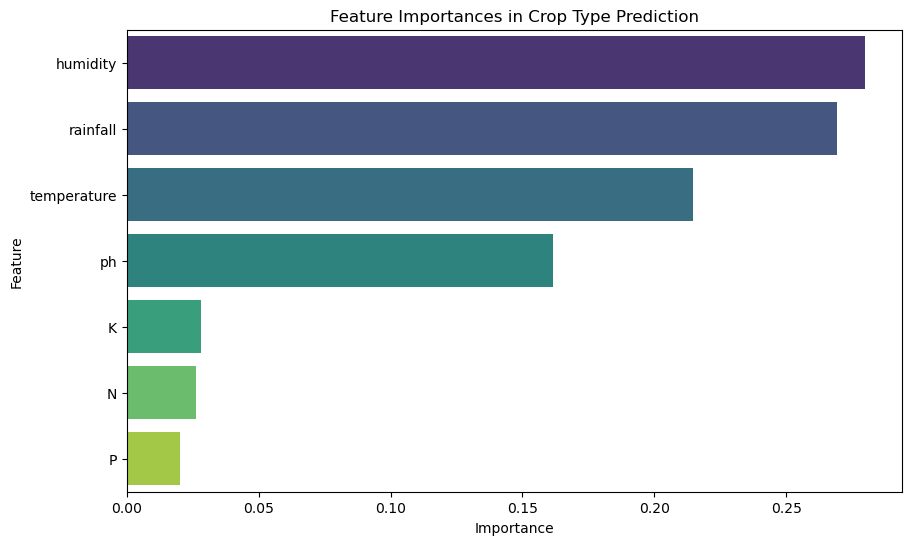

In [48]:
# Visualizing the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Feature Importances in Crop Type Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [50]:
import numpy as np
# Generating synthetic data
np.random.seed(42)  # For reproducibility
synthetic_data = {
    'temperature': np.random.uniform(10, 35, 5),  # Temperature in Celsius
    'humidity': np.random.uniform(10, 100, 5),    # Humidity in %
    'ph': np.random.uniform(4, 9, 5),             # pH of the soil
    'rainfall': np.random.uniform(20, 200, 5),    # Rainfall in mm
    'N': np.random.randint(50, 150, 5),           # Nitrogen content in soil
    'P': np.random.randint(5, 50, 5),             # Phosphorus content in soil
    'K': np.random.randint(5, 50, 5)              # Potassium content in soil
}
synthetic_df = pd.DataFrame(synthetic_data)

In [51]:
predicted_crops = optimal_model.predict(synthetic_df)

# Adding predictions to the synthetic DataFrame
synthetic_df['Predicted Crop'] = predicted_crops

# Displaying the synthetic data with predictions
print(synthetic_df)

   temperature   humidity        ph    rainfall    N   P   K Predicted Crop
0    19.363503  24.039507  4.102922   53.012812  108  19  25     Moth Beans
1    33.767858  15.227525  8.849549   74.763604   91  48  13         millet
2    28.299849  87.955853  8.162213  114.456158  141   7  43      Sugarcane
3    24.966462  64.100351  5.061696   97.750103  109  41  22          maize
4    13.900466  73.726532  4.909125   72.421245  129  11   8            Tea


In [52]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have your dataset loaded in a DataFrame 'dataset'
X = dataset[['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K']]
y = dataset['label']

# Splitting the dataset (replace this with your split if you have a specific one)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model (use your optimal parameters)
model = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Save the model to a file
with open('crop_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)
